In [20]:
import cellcharter as cc
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import pandas as pd
import scanpy as sc
import os
import matplotlib.patches as mpatches
import anndata as ad
from scipy.cluster.hierarchy import linkage, leaves_list
import scikit_posthocs as sp
from scipy.stats import kruskal
import json
import warnings
warnings.filterwarnings("ignore")

In [2]:
extension = 'svg'
save_path = f'/Users/lukashat/Documents/PhD_Schapiro/Projects/Myeloma_Standal/paper/plots/figures/figure_2/{extension}/'
save_path_supp = f'/Users/lukashat/Documents/PhD_Schapiro/Projects/Myeloma_Standal/paper/plots/figures/suppl_figure_2/{extension}/'
plt.rcParams['figure.dpi'] = 100
plt.rcParams['savefig.dpi'] = 300
adata = ad.read_h5ad("/Users/lukashat/Documents/PhD_Schapiro/Projects/Myeloma_Standal/results/standard/adatas/cells_final.h5ad")
with open('/Users/lukashat/Documents/PhD_Schapiro/Projects/Myeloma_Standal/github/myeloma_standal/src/Paper/figure_plots/neighborhood_color_map.json', 'r') as f:
    neighborhood_color_map = json.load(f)
with open('/Users/lukashat/Documents/PhD_Schapiro/Projects/Myeloma_Standal/github/myeloma_standal/src/Paper/figure_plots/phenotype_color_map.json', 'r') as f:
    phenotype_color_map = json.load(f)
with open('/Users/lukashat/Documents/PhD_Schapiro/Projects/Myeloma_Standal/github/myeloma_standal/src/Paper/figure_plots/disease_color_map.json', 'r') as f:
    disease_color_map = json.load(f)
with open('/Users/lukashat/Documents/PhD_Schapiro/Projects/Myeloma_Standal/github/myeloma_standal/src/Paper/figure_plots/disease3_color_map.json', 'r') as f:
    disease3_color_map = json.load(f)
neighborhood_colors = [neighborhood_color_map[cat] for cat in list(adata.obs['cellcharter_CN'].cat.categories)]
neighborhood_colors = ListedColormap(neighborhood_colors)
phenotype_colors = [phenotype_color_map[cat] for cat in list(adata.obs['Phenotype4'].cat.categories)]
phenotype_colors = ListedColormap(phenotype_colors)
disease_colors = [disease_color_map[cat] for cat in list(adata.obs['disease2'].cat.categories)]
disease_colors = ListedColormap(disease_colors)
disease3_colors = [disease3_color_map[cat] for cat in list(adata.obs['disease3'].cat.categories)]
disease3_colors = ListedColormap(disease3_colors)

# Stability

In [ ]:
autok = cc.tl.ClusterAutoK.load("/Users/lukashat/Documents/PhD_Schapiro/Projects/Myeloma_Standal/results/downstream/neighborhoods/cellcharter/autok_dmr_scale_layer3")

In [ ]:
plt.style.use('ggplot')
ax = cc.pl.autok_stability(autok, return_ax=True)
ax.figure.set_size_inches(9, 4) 
ax.set_ylabel("Cluster stability", fontsize=14)
ax.set_xlabel("Number of clusters", fontsize=14)
ax.set_xticklabels(ax.get_xticks(), fontsize=12)
ax.set_yticklabels([f"{y:.2f}" for y in ax.get_yticks()], fontsize=12)
plt.savefig(os.path.join(save_path, f'stable_clusters.{extension}'))

# A

In [ ]:
cc.gr.enrichment(adata, group_key=f'cellcharter_CN', label_key='Phenotype4', pvalues=True, n_perms=250)

In [ ]:
plt.style.use('default')
cc.pl.enrichment(adata, group_key=f'cellcharter_CN', label_key='Phenotype4', show_pvalues=True, figsize=(8,5), group_cluster=True, fontsize=12, dot_scale=1, save= os.path.join(save_path, f'enrichment_phenotypes+pvalues.{extension}'))

# B

In [2]:
adata.obs['cellcharter_CN'].value_counts()

NameError: name 'adata' is not defined

In [3]:
new_order = ['PC_OXPHOS', 'PROLIF_GLYC', 'PC_MYELOID', 'BONE_MYELOID', 
             'ADIPOCYTES_PC', 'ADAPTIVE_IMMUNE', 'HIF1A_IMMUNE', 
             'BONE_ADIPOCYTES', 'BONE_VASCULATURE']
adata.obs['cellcharter_CN'] = adata.obs['cellcharter_CN'].cat.reorder_categories(new_order, ordered=True)

In [ ]:
plot = sc.pl.stacked_violin(adata, adata.var_names, groupby='cellcharter_CN', cmap='coolwarm', use_raw=False, density_norm='area', figsize=(13, 5), return_fig=True)
plot.add_totals()
axes = plot.get_axes()
ax = axes['mainplot_ax']
ax.set_yticklabels(ax.get_yticklabels(), fontsize=14) 
ax.set_xticklabels(ax.get_xticklabels(), fontsize=14)
group_ax = axes['group_extra_ax']
for text in group_ax.texts:
    text.set_fontsize(12)
    current_pos = text.get_position()
    text.set_position((current_pos[0] + 12, current_pos[1]+4))
cax = axes['color_legend_ax']
cax.set_title('scaled mean\nexpression', fontsize=10)
cax.set_position([0.76, 0, 0.1, 0.05])
fig = axes['mainplot_ax'].figure
fig.savefig(os.path.join(save_path, f'stacked_violin.{extension}'), 
            dpi=300, 
            bbox_inches='tight')

In [9]:
grouped_df = pd.crosstab(
    [adata.obs['patient_ID'], adata.obs['disease3']], 
    adata.obs['cellcharter_CN'],
    normalize='index'
) 
summary_stats = grouped_df.groupby(level='disease3').agg(['mean'])
summary_stats.columns = summary_stats.columns.get_level_values(0)
summary_stats = summary_stats.reindex(['MM', 'SMM', 'MGUS'])
summary_stats

cellcharter_CN,PC_OXPHOS,PROLIF_GLYC,PC_MYELOID,BONE_MYELOID,ADIPOCYTES_PC,ADAPTIVE_IMMUNE,HIF1A_IMMUNE,BONE_ADIPOCYTES,BONE_VASCULATURE
disease3,,,,,,,,,
MM,0.131662,0.139629,0.182315,0.105781,0.110682,0.039663,0.164168,0.032195,0.093906
SMM,0.041268,0.170131,0.224042,0.119444,0.123092,0.023032,0.182722,0.039166,0.077102
MGUS,0.038932,0.191855,0.183832,0.122173,0.138390,0.024796,0.188366,0.031456,0.080200


In [10]:
plt.style.use('default')

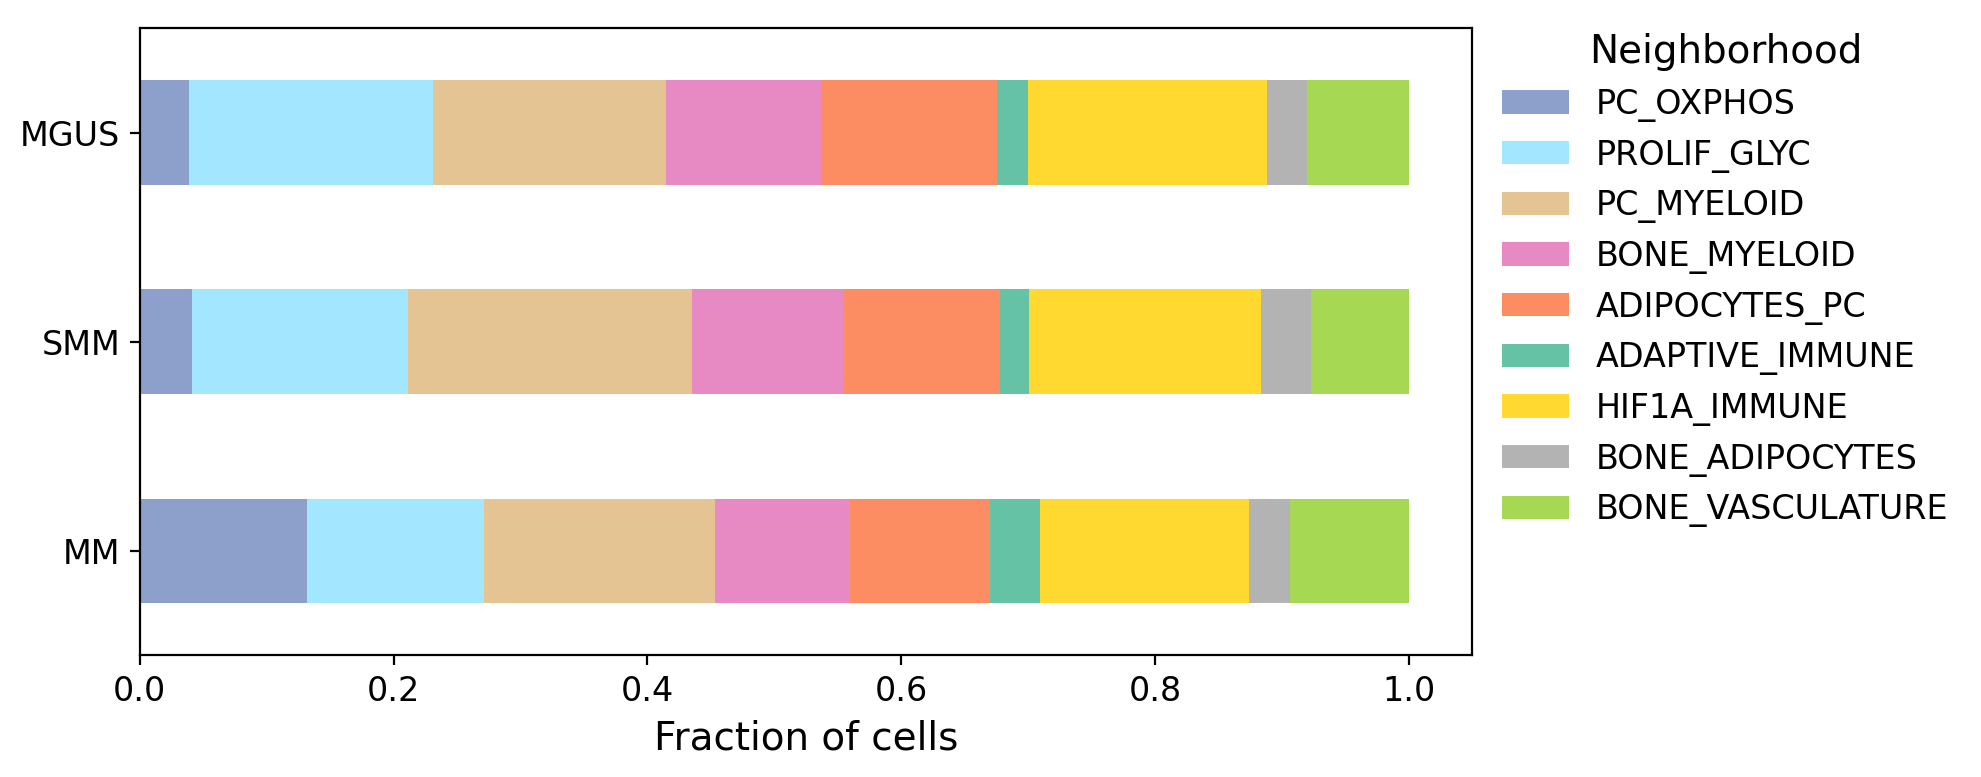

In [11]:
fig, ax = plt.subplots(figsize=(10, 4))
ax = summary_stats.plot(kind='barh', stacked=True, color=neighborhood_color_map, ax=ax)
plt.title('')
ax.set_xlabel('Fraction of cells', fontsize=14)
ax.set_xticklabels([f"{y:.1f}" for y in ax.get_xticks()], fontsize=12)
ax.set_yticklabels(ax.get_yticklabels(), fontsize=12)
plt.ylabel('')
plt.legend(title='Neighborhood', bbox_to_anchor=(1, 1.04), loc='upper left', fontsize=12, title_fontsize=14, framealpha=0)
plt.tight_layout()
plt.savefig(os.path.join(save_path, f'neighborhood_compositions_mean.{extension}'), dpi=300)

In [25]:
grouped_df = pd.crosstab(
    [adata.obs['patient_ID'], adata.obs['disease3']], 
    adata.obs['cellcharter_CN'],
    normalize='index'
) 

In [26]:
df = grouped_df.reset_index()
df = df[[col for col in df.columns if col in ['patient_ID', 'disease3', 'PC_OXPHOS', 'ADAPTIVE_IMMUNE']]]
df

cellcharter_CN,patient_ID,disease3,PC_OXPHOS,ADAPTIVE_IMMUNE
0,IMC01,MM,0.042081,0.055954
1,IMC02,MGUS,0.017934,0.006246
2,IMC03,MGUS,0.101356,0.011822
3,IMC04,MGUS,0.025603,0.034313
4,IMC05,SMM,0.038157,0.004996
...,...,...,...,...
71,IMC90.1,MM,0.134916,0.011288
72,IMC92,MM,0.052662,0.009502
73,IMC93,MM,0.073692,0.021389
74,IMC95,MM,0.046908,0.005060


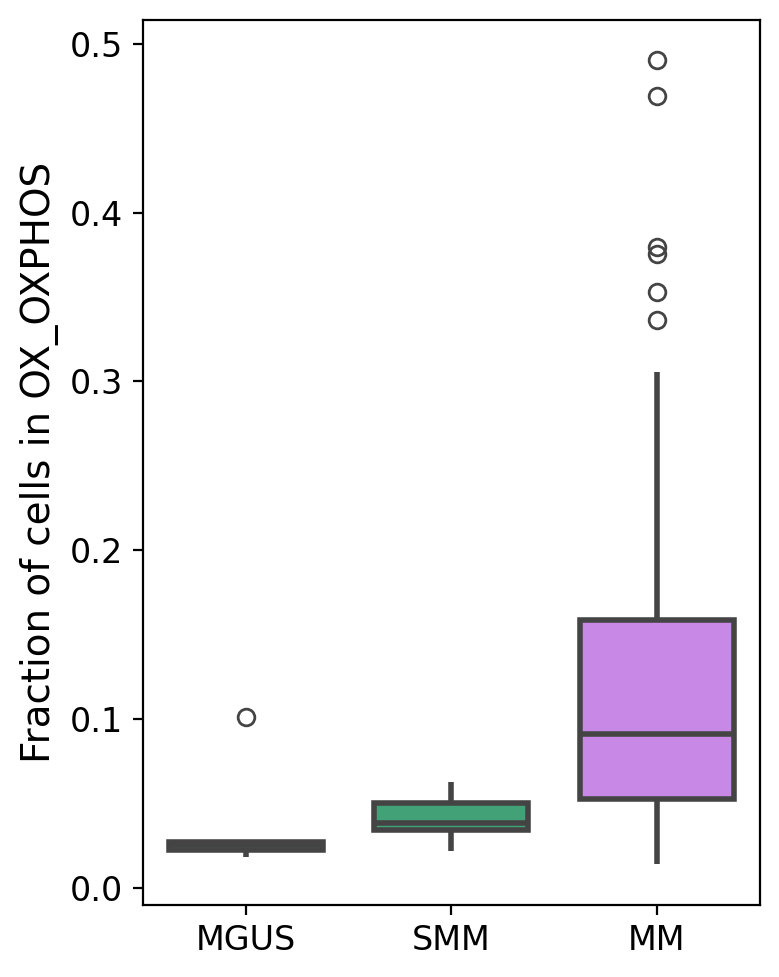

In [29]:
fig, ax = plt.subplots(figsize=(4, 5))
sns.boxplot(data=df, x='disease3', y='PC_OXPHOS', order=['MGUS', 'SMM', 'MM'], palette=disease3_color_map, showcaps=False, linewidth=2, width=0.75)
plt.xlabel('')
plt.ylabel('Fraction of cells in OX_OXPHOS', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.savefig(os.path.join(save_path, f'PC_OXPHOS_fraction.{extension}'), bbox_inches='tight')

In [21]:
groups = [group['PC_OXPHOS'].values for _, group in df.groupby('disease3')]
kruskal_result = kruskal(*groups)
print(f"Kruskal-Wallis H-stat: {kruskal_result.statistic:.3f}, p-val: {kruskal_result.pvalue:.4f}")

Kruskal-Wallis H-stat: 14.733, p-val: 0.0006


In [24]:
dunn_results = sp.posthoc_dunn(
    df,
    val_col='PC_OXPHOS',
    group_col='disease3',
    p_adjust='Bonferroni',
)
print("\nDunn's posthoc results:")
dunn_results


Dunn's posthoc results:


,MGUS,MM,SMM
MGUS,1.000000,0.012784,1.000000
MM,0.012784,1.000000,0.016496
SMM,1.000000,0.016496,1.000000


In [7]:
df = pd.crosstab(
    index=[adata.obs['patient_ID'], adata.obs['disease3']],
    columns=adata.obs['cellcharter_CN'],
    normalize='index'
)
df = df.reindex(['MM', 'SMM', 'MGUS'], level=1)
df = df.sort_index(level=1, key=lambda x: pd.Categorical(x, categories=['MGUS', 'SMM', 'MM'], ordered=True))
df

,cellcharter_CN,ADAPTIVE_IMMUNE,ADIPOCYTES_PC,BONE_ADIPOCYTES,BONE_MYELOID,BONE_VASCULATURE,HIF1A_IMMUNE,PC_MYELOID,PC_OXPHOS,PROLIF_GLYC
patient_ID,disease3,,,,,,,,,
IMC02,MGUS,0.006246,0.097341,0.040239,0.086278,0.056031,0.201374,0.238312,0.017934,0.256246
IMC03,MGUS,0.011822,0.090195,0.031994,0.101025,0.222222,0.150876,0.174272,0.101356,0.116237
IMC04,MGUS,0.034313,0.153792,0.047862,0.158895,0.046102,0.178251,0.181418,0.025603,0.173764
IMC72,MGUS,0.057086,0.174053,0.010159,0.143623,0.029638,0.219721,0.175824,0.027261,0.162636
IMC82,MGUS,0.014513,0.176570,0.027027,0.121043,0.047008,0.191608,0.149332,0.022505,0.250394
...,...,...,...,...,...,...,...,...,...,...
IMC90.1,MM,0.011288,0.136473,0.023900,0.090308,0.055897,0.256520,0.172596,0.134916,0.118100
IMC92,MM,0.009502,0.103492,0.057241,0.147338,0.019118,0.241557,0.235375,0.052662,0.133715
IMC93,MM,0.021389,0.144787,0.041046,0.106512,0.052996,0.162019,0.171112,0.073692,0.226446


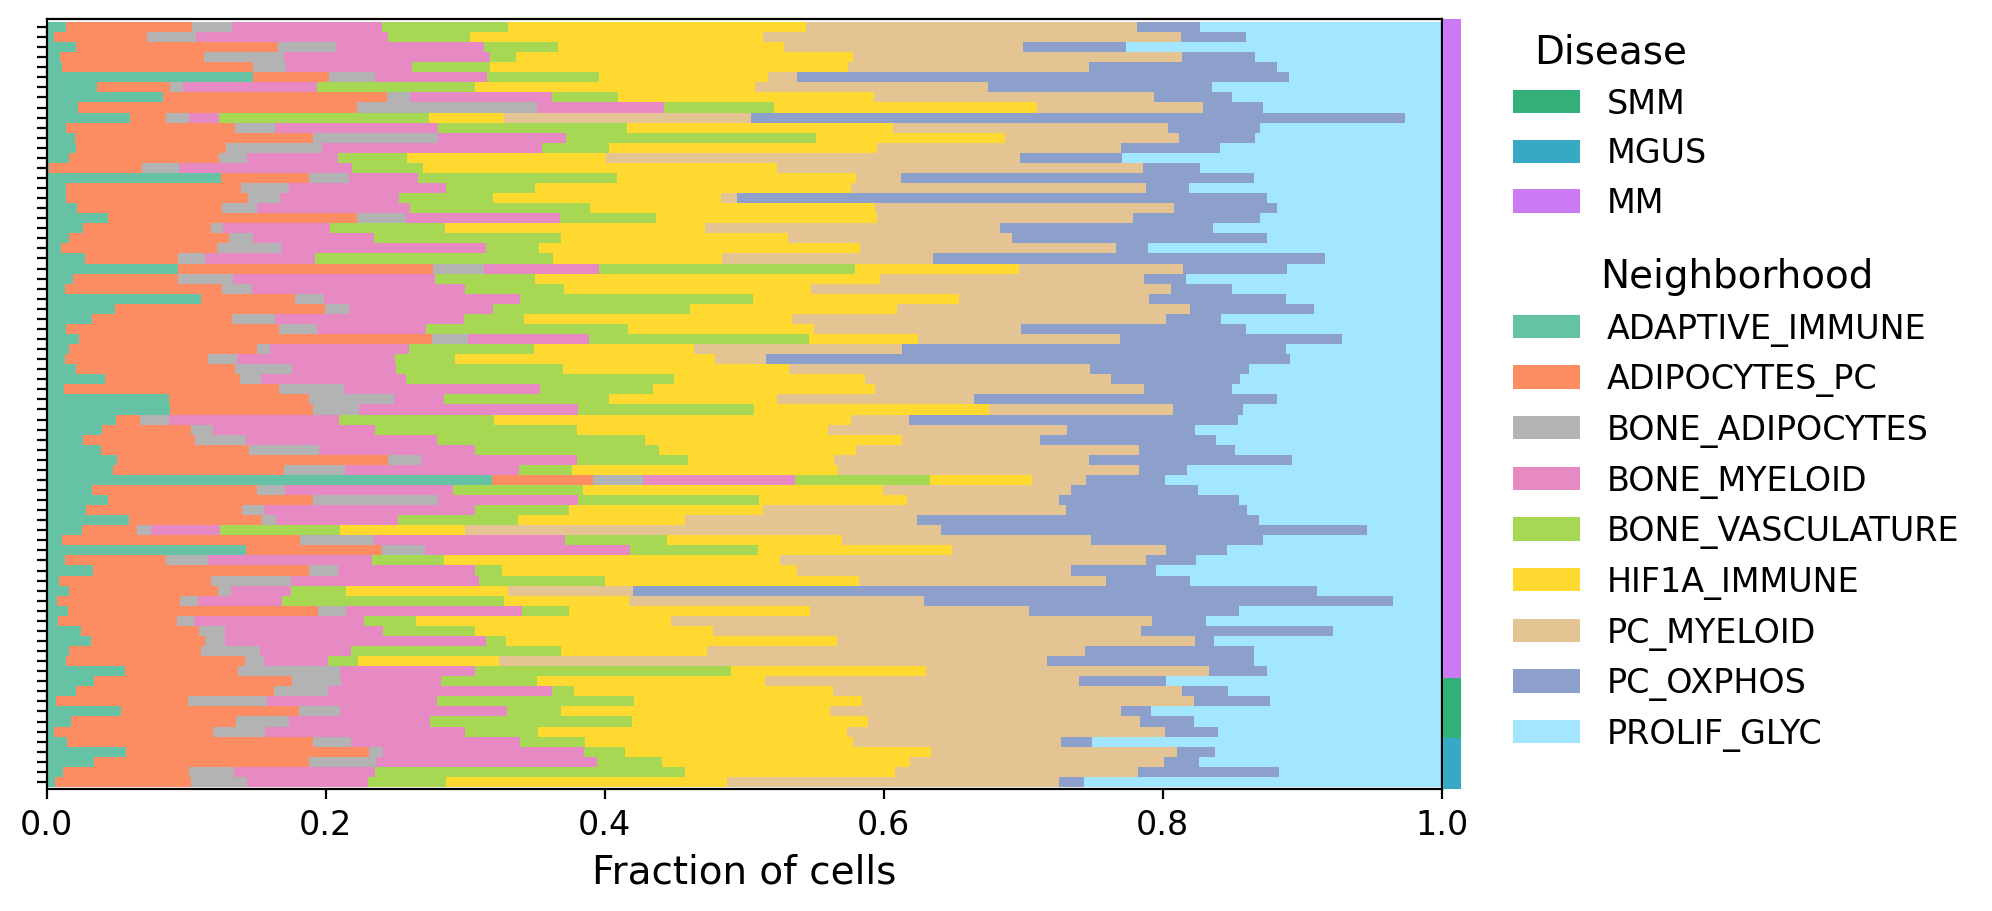

In [9]:
fig, ax = plt.subplots(figsize=(9, 5))
disease_labels = df.index.get_level_values('disease3')
disease_colors = [disease3_color_map[d] for d in disease_labels]

# Main plot
df.plot(kind='barh', stacked=True, colormap=neighborhood_colors, width=1, ax=ax)
ax.xaxis.grid(False)  # Explicit x-axis grid removal
ax.yaxis.grid(False)
ax.set_ylabel('')
ax.set_xlabel('Fraction of cells', fontsize=14)
ax.set_yticklabels('')
ax.set_xticklabels(ax.get_xticklabels(), fontsize=12)
ax.set_xlim(0, 1)

pos = ax.get_position()
pad = 0.001  
cbar_width = 0.01  

pos = ax.get_position()
ax_disease = fig.add_axes([
    pos.x1 + pad,
    pos.y0,
    cbar_width,
    pos.height
]) 


n_patients = len(df)
disease_colors_array = np.array(disease_colors).reshape(n_patients, 1, 3)
ax_disease.imshow(disease_colors_array, 
                aspect='auto', 
                extent=[0, 1, -0.5, n_patients-0.5], 
                origin='lower')

ax_disease.set_xticks([])
ax_disease.set_yticks([])
ax_disease.set_xticklabels([])
ax_disease.set_yticklabels([])

disease_handles = [
    mpatches.Patch(facecolor=color, label=disease)
    for disease, color in disease3_color_map.items()
]


disease_legend = ax.legend(
    handles=disease_handles,
    title='Disease',
    title_fontsize=14,
    loc='upper left',
    framealpha=0,
    bbox_to_anchor=(1.03, 1.022),  
    fontsize=12)
ax.add_artist(disease_legend)
ax.legend(title='Neighborhood', loc='upper left', framealpha=0, bbox_to_anchor=(1.03, 0.73), fontsize=12, title_fontsize=14)
ax_disease.set_axis_off()
fig.savefig(os.path.join(save_path, f"neighborhood_barplot_patients.{extension}"), bbox_inches='tight')

In [ ]:
groups = []
for disease in ['MGUS', 'SMM', 'MM']:
    group = df.xs(disease, level='disease3', drop_level=False)
    # Cluster MM patients using Euclidean distance + Ward linkage
    Z = linkage(group, method='ward', metric='euclidean')
    # Get optimal leaf ordering
    clustered_indices = leaves_list(Z)
    group = group.iloc[clustered_indices]
    groups.append(group)

# Rebuild DataFrame with clustered MM patients
clustered_df = pd.concat(groups)

In [ ]:
Z = linkage(df, method='ward', metric='euclidean')
# Get optimal leaf ordering
clustered_indices = leaves_list(Z)
clustered_df = df.iloc[clustered_indices]


In [ ]:
plt.style.use('default')
fig, ax = plt.subplots(figsize=(9, 5))
disease_labels = clustered_df.index.get_level_values('disease3')
disease_colors = [disease3_color_map[d] for d in disease_labels]

# Main plot
clustered_df.plot(kind='barh', stacked=True, colormap=neighborhood_colors, width=1.15, ax=ax)
ax.set_ylabel('')
ax.set_xlabel('Fraction of cells', fontsize=14)
ax.set_yticklabels('')
ax.set_xticklabels([f"{y:.1f}" for y in ax.get_xticks()], fontsize=12)
ax.set_xlim(0, 1)

pos = ax.get_position()
pad = 0.001  
cbar_width = 0.01  

pos = ax.get_position()
ax_disease = fig.add_axes([
    pos.x1 + pad,
    pos.y0,
    cbar_width,
    pos.height
]) 


n_patients = len(df)
disease_colors_array = np.array(disease_colors).reshape(n_patients, 1, 3)
ax_disease.imshow(disease_colors_array, 
                aspect='auto', 
                extent=[0, 1, -0.5, n_patients-0.5], 
                origin='lower')

ax_disease.set_xticks([])
ax_disease.set_yticks([])
ax_disease.set_xticklabels([])
ax_disease.set_yticklabels([])

disease_handles = [
    mpatches.Patch(facecolor=color, label=disease)
    for disease, color in disease3_color_map.items()
]


disease_legend = ax.legend(
    handles=disease_handles,
    title='Disease',
    loc='upper left',
    framealpha=0,
    bbox_to_anchor=(1.05, 1.022),  
    title_fontsize=14,
    fontsize=12
)

# Maintain both legends
ax.add_artist(disease_legend)
ax.legend(title='Neighborhood', loc='upper left', framealpha=0, bbox_to_anchor=(1.05, 0.73), fontsize=12, title_fontsize=14)
ax_disease.set_axis_off()
fig.savefig(os.path.join(save_path, f"neighborhood_barplot_patients_clustered.{extension}"), bbox_inches='tight')

# Distance to bone

In [ ]:
fig,ax = plt.subplots(figsize=(7, 5))
sc.pl.violin(adata, keys='distance_to_bone_corrected', groupby='cellcharter_CN', palette=neighborhood_color_map, stripplot=False, rotation=90, inner='box', show=False, ax=ax)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, fontsize=12)
ax.set_xlabel('')
ax.set_ylabel('µm', fontsize=14)
ax.set_yticklabels(ax.get_yticks(), fontsize=12)
ax.set_title('Distance to Bone', fontsize=16)
plt.tight_layout()
fig.savefig(os.path.join(save_path, f'distance_to_bone_neighborhoods.{extension}'))

# Enrichment plots

In [ ]:
cc.gr.nhood_enrichment(
    adata,
    cluster_key=f'cellcharter_CN',
    only_inter = True,
    pvalues=True,
    n_jobs=10,
    n_perms=250
)

In [ ]:
fig, ax = plt.subplots(figsize=(8, 5))
cc.pl.nhood_enrichment(
    adata,
    cluster_key=f'cellcharter_CN',
    annotate=True,
    significance=0.05,
    figsize=(4,4),
    vmin=-0.15,
    vmax=0.25,
    cmap = 'RdBu_r',
    title='Enrichment patterns',
    ax=ax,
    #save= os.path.join(save_path, f'nhood_enrichment_all.{extension}')
)
ax.set_ylabel('')

In [ ]:
cc.pl.nhood_enrichment(
    adata,
    cluster_key=f'cellcharter_CN',
    annotate=True,
    significance=0.05,
    figsize=(4,4),
    vmin=-0.15,
    vmax=0.25,
    cmap = 'RdBu_r',
    title='Enrichment patterns',
    fontsize=12,
    save= os.path.join(save_path, f'nhood_enrichment_all.{extension}')
)

In [ ]:
adata_mm = adata[adata.obs['disease3'] == 'MM'].copy()
adata_smm = adata[adata.obs['disease3'] == 'SMM'].copy()
adata_mgus = adata[adata.obs['disease3'] == 'MGUS'].copy()

In [ ]:
cc.gr.nhood_enrichment(
    adata_mm,
    cluster_key=f'cellcharter_CN',
    only_inter = True,
    pvalues=True,
    n_jobs=10,
    n_perms=250
)

In [ ]:
cc.gr.nhood_enrichment(
    adata_smm,
    cluster_key=f'cellcharter_CN',
    only_inter = True,
    pvalues=True,
    n_jobs=10,
    n_perms=250
)

In [ ]:
cc.gr.nhood_enrichment(
    adata_mgus,
    cluster_key=f'cellcharter_CN',
    only_inter = True,
    pvalues=True,
    n_jobs=10,
    n_perms=250
)

In [ ]:
cc.pl.nhood_enrichment(
    adata_mm,
    cluster_key=f'cellcharter_CN',
    annotate=True,
    significance=0.05,
    figsize=(4,4),
    vmin=-0.15,
    vmax=0.25,
    cmap = 'RdBu_r',
    title='Enrichment patterns in MM',
    fontsize=12,
    save= os.path.join(save_path_supp, f'nhood_enrichment_mm.{extension}')
)

In [ ]:
cc.pl.nhood_enrichment(
    adata_smm,
    cluster_key=f'cellcharter_CN',
    annotate=True,
    significance=0.05,
    figsize=(4,4),
    vmin=-0.15,
    vmax=0.25,
    cmap = 'RdBu_r',
    title='Enrichment patterns in SMM',
    fontsize=12,
    save= os.path.join(save_path_supp, f'nhood_enrichment_smm.{extension}')
)

In [ ]:
cc.pl.nhood_enrichment(
    adata_mgus,
    cluster_key=f'cellcharter_CN',
    annotate=True,
    significance=0.05,
    figsize=(4,4),
    vmin=-0.15,
    vmax=0.25,
    cmap = 'RdBu_r',
    title='Enrichment patterns in MGUS',
    fontsize=12,
    save= os.path.join(save_path_supp, f'nhood_enrichment_mgus.{extension}')
)